##Opticspy has a lot of other interesting and usefull functions: Gauss beam calculation and simulation, some functions about lens design and aberration(third order aberration, field curvature and zoom position analysis), Jones matrix

###Gauss beam calculation and simulation

In [1]:
%matplotlib inline
import opticspy

In [2]:
G1 = opticspy.gauss.gausscal(z = 2)

               Gaussian Beams Calculator
--------------------------------------------------------
|              Axial Distance, z (mm) |  2.0    
|                 Beam Waist, w0 (mm) |  0.1    
|             Wavelength, lambda (um) |  0.633  
|       Half Beam Diameter, w(z) (mm) |  0.1    
|      Radius of Curvature, R(z) (mm) |  1233.579 
|             Rayleigh Range, z0 (mm) |  49.63  
|     Rayleigh Half Diameter, w0 (mm) |  0.141  
| Half Angle Divergence, theta (mrad) |  2.015  
--------------------------------------------------------


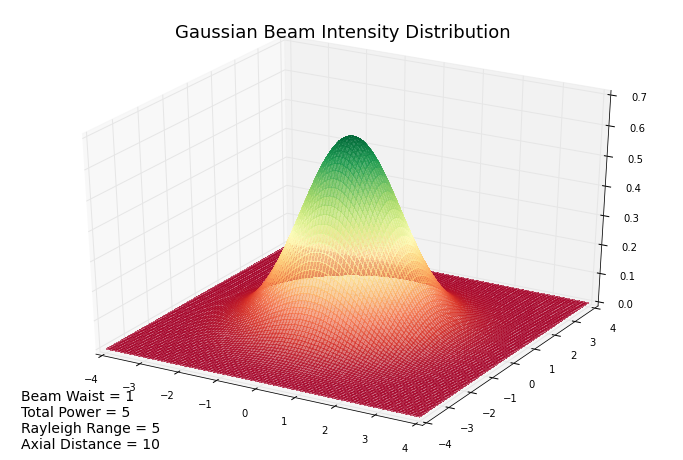

In [3]:
G2 = opticspy.gauss.gaussbeam(w0=1, P=5, z0=5, z=10)

###Third order ray aberration calculation

third order aberration


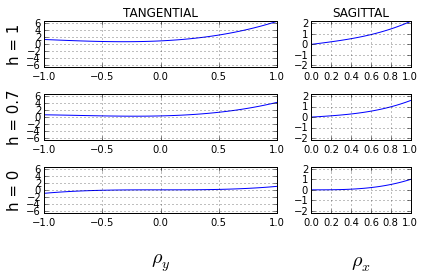

In [4]:
T = opticspy.lens.aberration.third(1,1,0.2,1,1)

###Field Curvature calculation

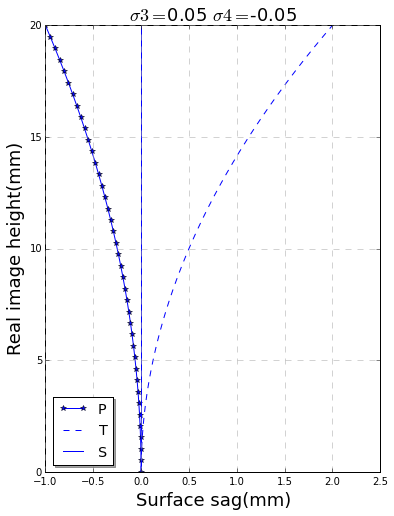

In [5]:
F = opticspy.lens.aberration.fieldcurve(sigma3 = 0.05, sigma4 = -0.05, FNO = 10, H = 20)

###Zoom position analysis(Two element infinite conjugate zoom)

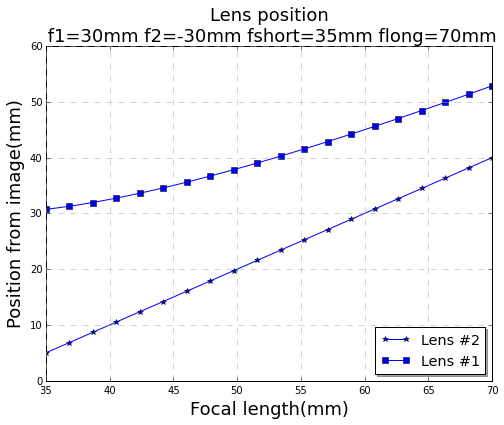

In [6]:
L1 = opticspy.lens.zoom_position.zoom_cal(f1 = 30,f2 = -30, fshort = 35, flong = 70)

###Zoom position analysis(Two element finite conjugate zoom), two solution

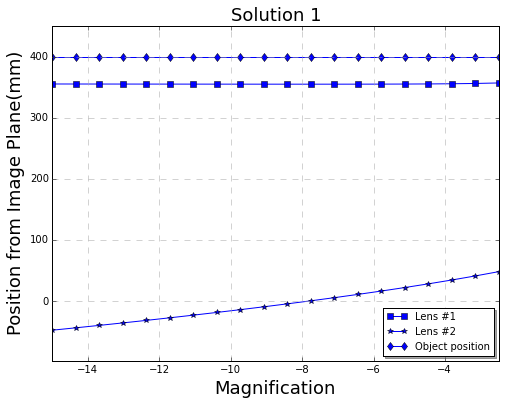

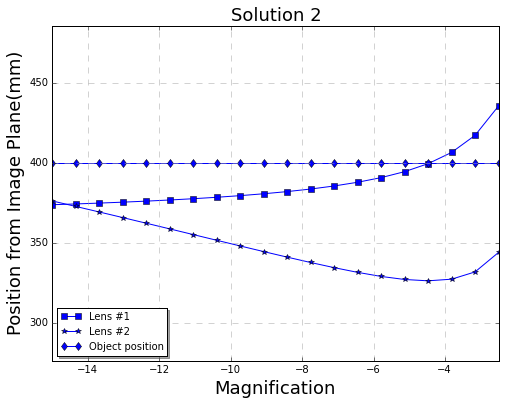

In [7]:
L2 = opticspy.lens.zoom_position.zoom_cal2(40,60,400,-15,-2.5)

###Zoom position analysis(Three element infinite conjugate zoom), two solution

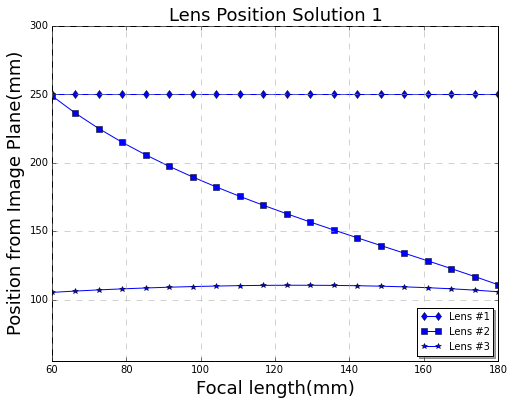

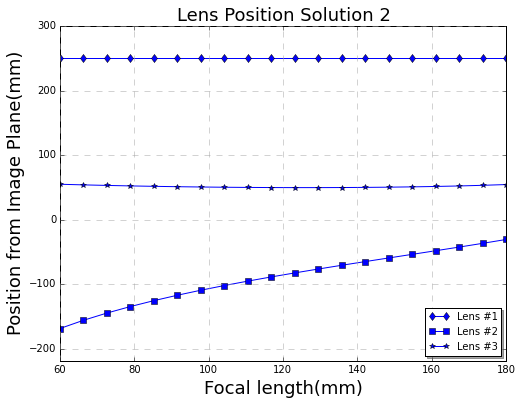

In [8]:
L3 = opticspy.lens.zoom_position.zoom_cal3(f0 = 330,f1 = -120, f2 = 80, flong = 180, fshort = 60, L_prime = 250)

###Polarization and Jones Matrix:
###HalfWavePlate, QuaterWavePlate, Birefringence (could rotate)
###Horizontal, Vertical, Diagonal, Anti-Diagonal, Right Hand Circular Polarized, Left Hand Circular Polarized Jones vectors

###1. HalfWavePlate

In [9]:
pi = 3.1415926
H = opticspy.jones.HalfWavePlate()
H

[[ 1  0]
 [ 0 -1]]

In [10]:
H.rotate(pi/8)

[[ 0.70710679  0.70710677]
 [ 0.70710677 -0.70710679]]

###2. QuaterWavePlate

In [11]:
Q = opticspy.jones.QuaterWavePlate()
Q

[[ 1.+0.j  0.+0.j]
 [ 0.+0.j  0.+1.j]]

In [12]:
Q.rotate(pi/4)

[[ 0.50000001+0.49999999j  0.50000000-0.5j       ]
 [ 0.50000000-0.5j         0.49999999+0.50000001j]]

###3. Birefringence(this example for barium borate BaB2O4, no=1.6776, ne=1.5534)

In [13]:
B = opticspy.jones.Birefringence(1.6776,1.5534)
B

[[-0.10660074+0.99430191j  0.00000000+0.j        ]
 [ 0.00000000+0.j          0.01739545+0.99984869j]]

###4. A combination example:
###A diagonal polarized light go through a quaterwave plate(90 degree) and a halfwave plate(45 degree)

In [14]:
D = opticspy.jones.D1pol()
Q.rotate(pi/4)*H.rotate(pi/8)*D

[[ 0.70710679+0.70710677j]
 [ 0.70710677-0.70710679j]]